In [50]:
# Import necessary libraries  
pd.set_option('mode.chained_assignment', None) # for 'SettingWithCopyWarning'
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import pprint as pprint
from random import uniform
from config import api_key
from scipy.stats import linregress

#from sklearn import datasets

In [ ]:
url = f"http://api.openweathermap.org/data/2.5/weather?lat=-29&lon=43&appid={api_key}"



response = requests.get(url).json()
print(json.dumps(response, indent=4, sort_keys=True))

#pprint.pprint(response)

In [ ]:
plot_data = pd.DataFrame(temp_data, columns=("Lat", "Temp"))
plot_data.plot.scatter(x="Lat", y="Temp")

In [48]:
city_list = pd.DataFrame(columns={"Lat", "Long", "ID", "Temp", "Humidity", "Cloudiness", "Windspeed"})

while (len(city_list) < 500):
  #  geo_position = round(uniform(-90, 90),0), round(uniform(-180, 180),4)
    geo_position = (uniform(-90, 90), uniform(-180, 180))
    url = f"http://api.openweathermap.org/data/2.5/weather?lat={geo_position[0]}&lon={geo_position[1]}&appid={api_key}"
    response = requests.get(url).json()

    if (response['id'] not in city_list['ID']) & (response['id'] != 0):
        new_city = pd.DataFrame({"Lat":geo_position[0], "Long":geo_position[0], "ID":response['id'],
                                 "Temp":response['main']['temp'], "Humidity":response['main']['humidity'],
                                 "Cloudiness":[response['clouds']['all']], "Windspeed":response['wind']['speed']})
        city_list = city_list.append(new_city)
        if (len(city_list)% 100)==0:
            print("100")
    
city_list

100
100


KeyboardInterrupt: 

In [60]:
city_list[['Humidity', 'Cloudiness']] = city_list[['Humidity', 'Cloudiness']].astype(int)
n_hem = city_list[city_list['Lat'] >= 0]
s_hem = city_list[city_list['Lat'] < 0]



### Scatter plots - Temperature (F) vs Latitude (deg)

In [ ]:
# plt.subplots()
plot_1 = city_list.plot.scatter(x="Temp", y='Lat', color='r', alpha=0.6, figsize=(12,8))
# plt.plot(x="Temp", y='Lat', kind='scatter')
# Formatting and Display

plt.title("Scatter Plot: Temperature (degrees Farenheit) vs Latitude (degrees)", fontsize=14)
plt.xlabel('Temperature (F)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Text(249, 11, 'r$^{ 2}$=  0.74')

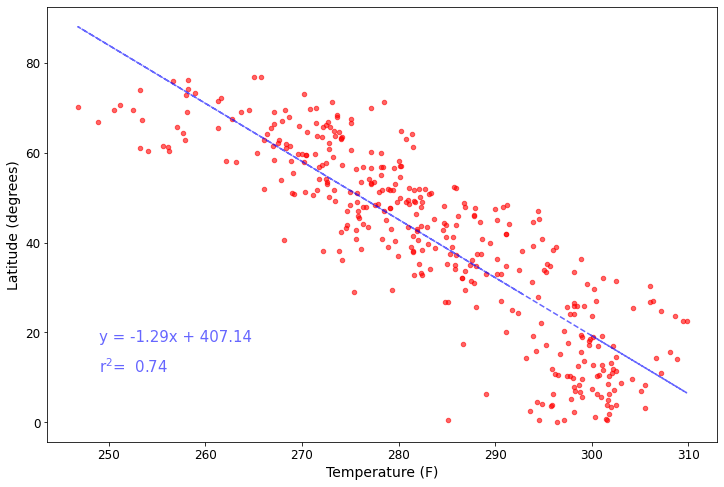

In [49]:
# Perform linear regression
x_values = n_hem['Temp']
y_values = n_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values and create strings for equation and r-squared
regress_values = x_values * slope + intercept
n_hem['temp reg values'] = regress_values
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_val =  "r$^{ 2}$=  " + str(round(rvalue**2,2))

# Plot the scatter plot and regression values
plot_1a = n_hem.plot.scatter(x="Temp", y='Lat', color='r', alpha=0.6,figsize=(12,8))
n_hem.plot(x="Temp", y='temp reg values', color='b', legend=False, ax=plot_1a, linestyle='--', alpha=0.6)

# Formatting and display
plt.xlabel('Temperature (F)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.annotate(line_eq, (249,18), fontsize=15, color="b", alpha=0.6)
plt.annotate(r_val, (249,11), fontsize=15, color="b", alpha=0.6)
#plt.show()

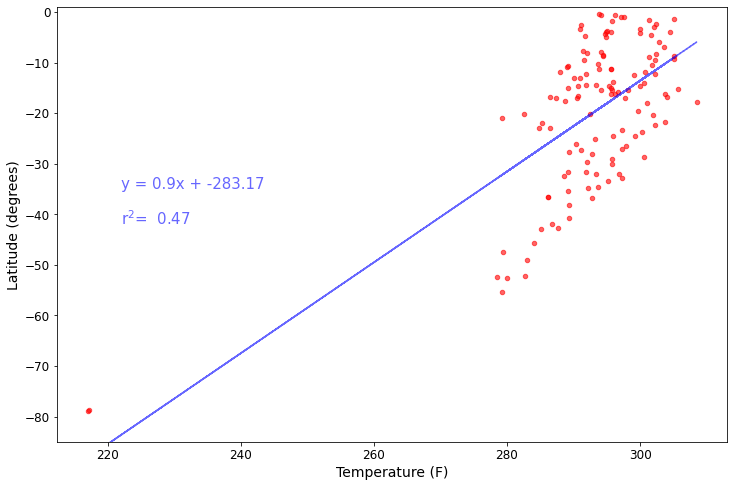

In [51]:
# Perform linear regression
x_values = s_hem['Temp']
y_values = s_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values and create strings for equation and r-squared
regress_values = x_values * slope + intercept
s_hem['temp reg values'] = regress_values
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_val =  "r$^{ 2}$=  " + str(round(rvalue**2,2))

# Plot the scatter plot and regression values
plot_1b = s_hem.plot.scatter(x="Temp", y='Lat', color='r', alpha=0.6,figsize=(12,8))
s_hem.plot(x="Temp", y='temp reg values', color='b', legend=False, ax=plot_1b, linestyle='--', alpha=0.6)

# Formatting and display
plt.xlabel('Temperature (F)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(-85,1)
plt.annotate(line_eq, (222,-35), fontsize=15, color="b", alpha=0.6)
plt.annotate(r_val, (222,-42), fontsize=15, color="b", alpha=0.6)
plt.show()

### Scatter plots - Humidity (%) vs Latitude (deg)

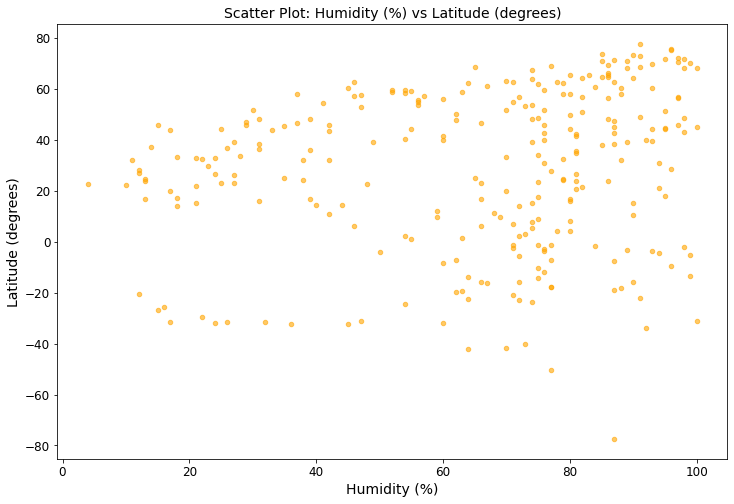

In [52]:
plot_2 = city_list.plot.scatter(x="Humidity", y='Lat', color='orange', alpha=0.6, figsize=(12,8))

plt.title("Scatter Plot: Humidity (%) vs Latitude (degrees)", fontsize=14)
plt.xlabel('Humidity (%)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

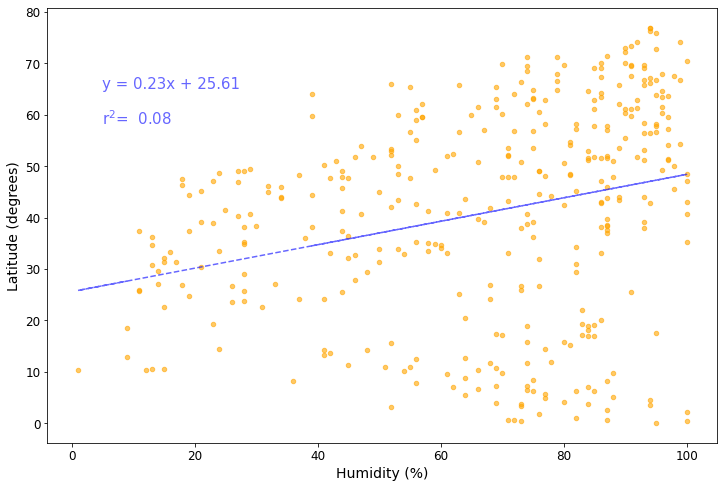

In [53]:
# Perform linear regression
x_values = n_hem['Humidity']
y_values = n_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values and create strings for equation and r-squared
regress_values = x_values * slope + intercept
n_hem['humidity reg values'] = regress_values
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_val =  "r$^{ 2}$=  " + str(round(rvalue**2,2))

# Plot the scatter plot and regression values
plot_2a = n_hem.plot.scatter(x="Humidity", y='Lat', color='orange', alpha=0.6,figsize=(12,8))
n_hem.plot(x="Humidity", y='humidity reg values', color='b', legend=False, ax=plot_2a, linestyle='--', alpha=0.6)

# Formatting and display
plt.xlabel('Humidity (%)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.annotate(line_eq, (5,65), fontsize=15, color="b", alpha=0.6)
plt.annotate(r_val, (5,58), fontsize=15, color="b", alpha=0.6)
plt.show()

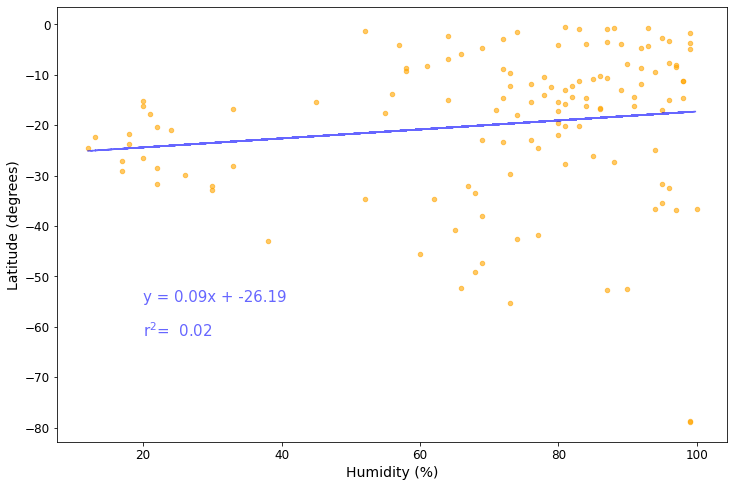

In [54]:
# Perform linear regression
x_values = s_hem['Humidity']
y_values = s_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values and create strings for equation and r-squared
regress_values = x_values * slope + intercept
s_hem['humidity reg values'] = regress_values
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_val =  "r$^{ 2}$=  " + str(round(rvalue**2,2))

# Plot the scatter plot and regression values
plot_2b = s_hem.plot.scatter(x="Humidity", y='Lat', color='orange', alpha=0.6,figsize=(12,8))
s_hem.plot(x="Humidity", y='humidity reg values', color='b', legend=False, ax=plot_2b, linestyle='--', alpha=0.6)

# Formatting and display
plt.xlabel('Humidity (%)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.annotate(line_eq, (20,-55), fontsize=15, color="b", alpha=0.6)
plt.annotate(r_val, (20,-62), fontsize=15, color="b", alpha=0.6)
plt.show()

### Scatter plots - Cloudiness (%) vs Latitude (deg)

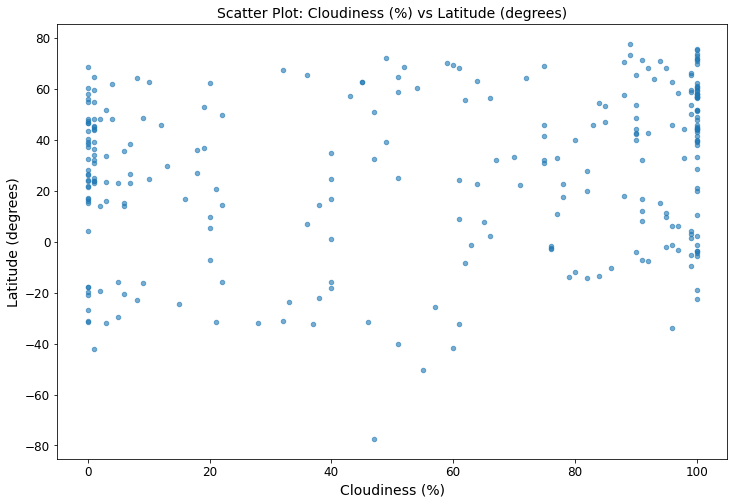

In [66]:
plot_3 = city_list.plot.scatter(x="Cloudiness", y='Lat', alpha=0.6, figsize=(12,8))

plt.title("Scatter Plot: Cloudiness (%) vs Latitude (degrees)", fontsize=14)
plt.xlabel('Cloudiness (%)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

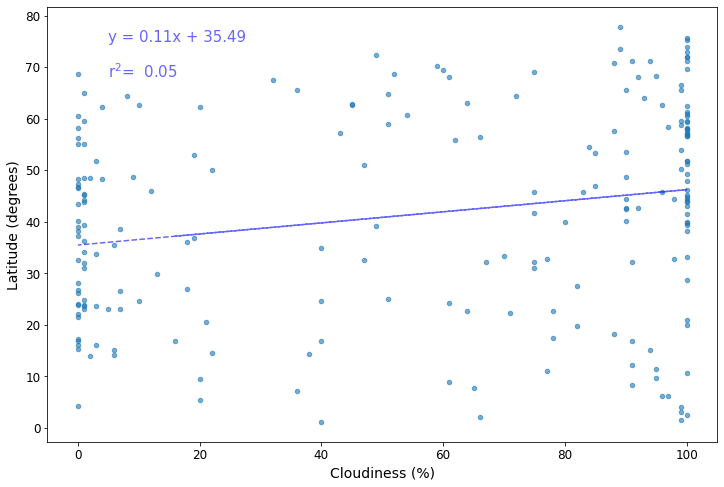

In [67]:
# Perform linear regression
x_values = n_hem['Cloudiness']
y_values = n_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values and create strings for equation and r-squared
regress_values = x_values * slope + intercept
n_hem['cloudiness reg values'] = regress_values
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_val =  "r$^{ 2}$=  " + str(round(rvalue**2,2))

# Plot the scatter plot and regression values
plot_3a = n_hem.plot.scatter(x="Cloudiness", y='Lat', alpha=0.6,figsize=(12,8))
n_hem.plot(x="Cloudiness", y='cloudiness reg values', color='b', legend=False, ax=plot_3a, linestyle='--', alpha=0.6)

# Formatting and display
plt.xlabel('Cloudiness (%)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.annotate(line_eq, (5,75), fontsize=15, color="b", alpha=0.6)
plt.annotate(r_val, (5,68), fontsize=15, color="b", alpha=0.6)
plt.show()

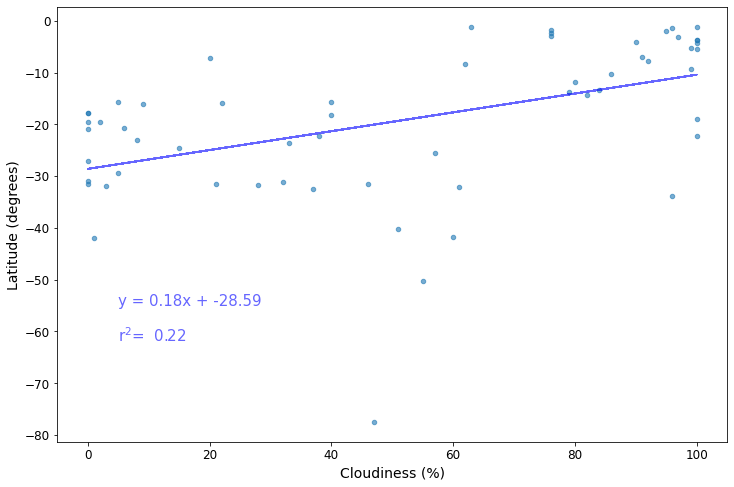

In [69]:
# Perform linear regression
x_values = s_hem['Cloudiness']
y_values = s_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values and create strings for equation and r-squared
regress_values = x_values * slope + intercept
s_hem['cloudiness reg values'] = regress_values
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_val =  "r$^{ 2}$=  " + str(round(rvalue**2,2))

# Plot the scatter plot and regression values
plot_3b = s_hem.plot.scatter(x="Cloudiness", y='Lat', alpha=0.6,figsize=(12,8))
s_hem.plot(x="Cloudiness", y='cloudiness reg values', color='b', legend=False, ax=plot_3b, linestyle='--', alpha=0.6)

# Formatting and display
plt.xlabel('Cloudiness (%)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.annotate(line_eq, (5,-55), fontsize=15, color="b", alpha=0.6)
plt.annotate(r_val, (5,-62), fontsize=15, color="b", alpha=0.6)
plt.show()

### Scatter plots - Windspeed (mph) vs Latitude (deg)

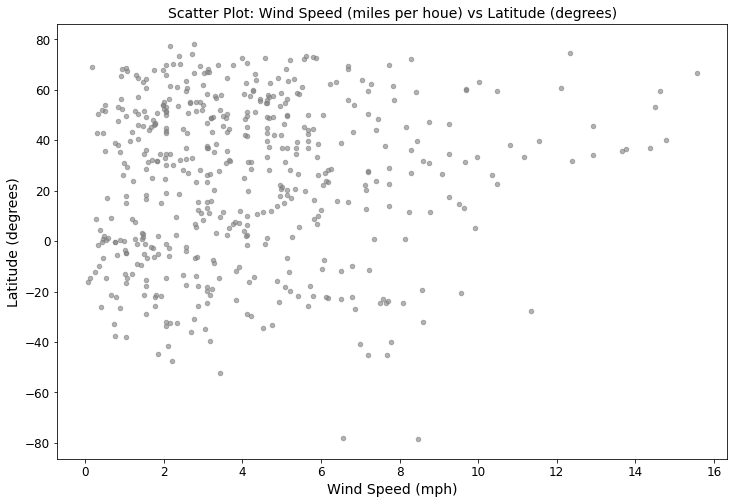

In [22]:
plot_4 = city_list.plot.scatter(x="Windspeed", y='Lat', color='gray', alpha=0.6, figsize=(12,8))

plt.title("Scatter Plot: Wind Speed (miles per houe) vs Latitude (degrees)", fontsize=14)
plt.xlabel('Wind Speed (mph)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

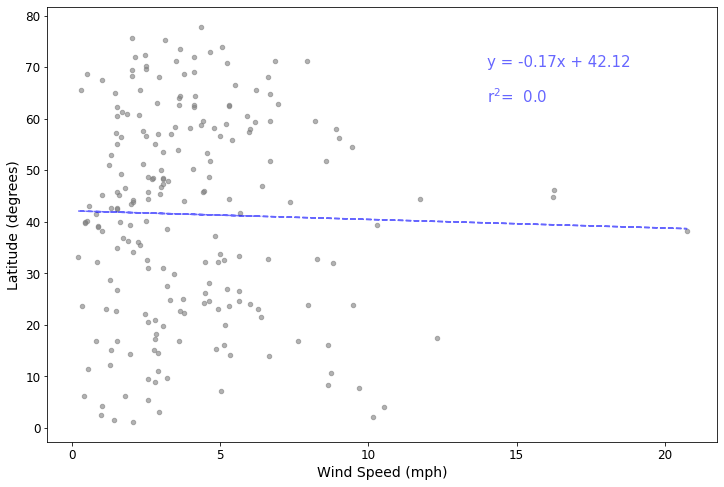

In [72]:
# Perform linear regression
x_values = n_hem['Windspeed']
y_values = n_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values and create strings for equation and r-squared
regress_values = x_values * slope + intercept
n_hem['windspeed reg values'] = regress_values
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_val =  "r$^{ 2}$=  " + str(round(rvalue**2,2))

# Plot the scatter plot and regression values
plot_4a = n_hem.plot.scatter(x="Windspeed", y='Lat', color='gray', alpha=0.6,figsize=(12,8))
n_hem.plot(x="Windspeed", y='windspeed reg values', color='b', legend=False, ax=plot_4a, linestyle='--', alpha=0.6)

# Formatting and display
plt.xlabel('Wind Speed (mph)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.annotate(line_eq, (14,70), fontsize=15, color="b", alpha=0.6)
plt.annotate(r_val, (14,63), fontsize=15, color="b", alpha=0.6)
plt.show()

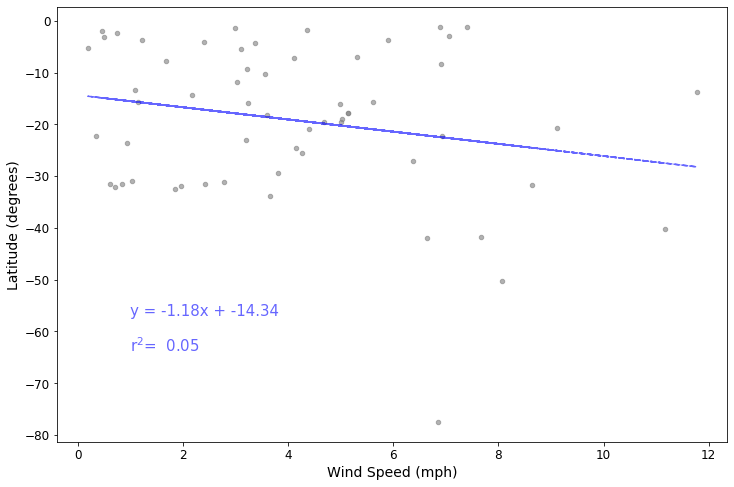

In [76]:
# Perform linear regression
x_values = s_hem['Windspeed']
y_values = s_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values and create strings for equation and r-squared
regress_values = x_values * slope + intercept
s_hem['windspeed reg values'] = regress_values
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_val =  "r$^{ 2}$=  " + str(round(rvalue**2,2))

# Plot the scatter plot and regression values
plot_4b = s_hem.plot.scatter(x="Windspeed", y='Lat', color='gray', alpha=0.6,figsize=(12,8))
s_hem.plot(x="Windspeed", y='windspeed reg values', color='b', legend=False, ax=plot_4b, linestyle='--', alpha=0.6)

# Formatting and display
plt.xlabel('Wind Speed (mph)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.annotate(line_eq, (1,-57), fontsize=15, color="b", alpha=0.6)
plt.annotate(r_val, (1,-64), fontsize=15, color="b", alpha=0.6)
plt.show()